In [1]:
import pandas as pd
import numpy as np

# Specify the path to the CSV file
csv_file_path = r'D:\JOY\J AMITY\Machine Learning\Bengaluru_House_Data.csv'
data = pd.read_csv(csv_file_path)
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Data Preprocessing and Cleaning

In [2]:
data.shape

(13320, 9)

In [3]:
j=data.copy()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
data=data.drop({"area_type","society","balcony","availability"},axis='columns')
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
data=data.dropna()
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
data["size"].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [10]:
data["size"] = data["size"].str[:2]
data.rename(columns={"size": "BHK"}, inplace=True)
data

,location,BHK,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [11]:
# Convert "BHK" column to integer type
data["BHK"] = data["BHK"].astype(int)

# Filter rows where "BHK" is less than or equal to 6
data = data[data["BHK"] <=6 ]
data['BHK'].value_counts()


BHK
2    5527
3    4832
4    1395
1     649
5     353
6     221
Name: count, dtype: int64

In [12]:
data[data["BHK"] == 6]


,location,BHK,total_sqft,bath,price
9,Gandhi Bazar,6,1020,6.0,370.0
58,Murugeshpalya,6,1407,4.0,150.0
79,ISRO Layout,6,4400,6.0,250.0
85,Hegde Nagar,6,3000,7.0,210.0
89,Rajaji Nagar,6,710,6.0,160.0
...,...,...,...,...,...
13045,Vasanthpura,6,600,6.0,65.0
13170,Prasanna layout Herohalli,6,1800,5.0,140.0
13200,Defence Colony,6,8000,6.0,2800.0
13217,T Dasarahalli,6,1200,3.0,125.0


In [13]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def flo(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
data[~data["total_sqft"].apply(flo)].head(10)

,location,BHK,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000
772,Banashankari Stage VI,2,1160 - 1195,2.0,59.935


In [16]:
def convert(x):
    t = x.split('-')
    if len(t) == 2:
        return (float(t[0]) + float(t[1])) / 2
    try:
        return float(x)
    except ValueError:
        if ('Meter' in x) and ('Sq.' not in x):
            # Convert to square foot for Meter unit (assuming 1 meter = 10.7639 square foot)
            return float(x.replace(' Meter', '')) * 10.7639
        elif 'Perch' in x:
            # Convert to square foot for Perch unit (assuming 1 perch = 272.25 square foot)
            return float(x.replace(' Perch', '')) * 272.25
        elif '34.46Sq. Meter' in x:
            # Remove 'Sq' from the string, convert to float, and assume it's already in square foot
            x = x[:-10]
            return float(x.replace(' Sq.', ''))
        return None


In [17]:
convert('4125 Perch')

1123031.25

In [18]:
df=data.copy()
df['total_sqft']=df['total_sqft'].apply(convert)
df.head()

,location,BHK,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [19]:
df.loc[30]

location      Yelahanka
BHK                   4
total_sqft       2475.0
bath                4.0
price             186.0
Name: 30, dtype: object

In [20]:
df['Price_sq']=df['price']*100000/df['total_sqft']
df.head()

,location,BHK,total_sqft,bath,price,Price_sq
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [21]:
df["location"].value_counts()

location
Whitefield                        534
Sarjapur  Road                    392
Electronic City                   301
Kanakpura Road                    266
Thanisandra                       232
                                 ... 
1A Block Koramangala                1
asha township, off hennur road      1
Escorts Colony                      1
Rahat Bagh                          1
Abshot Layout                       1
Name: count, Length: 1274, dtype: int64

In [22]:
# Get counts of each location
counts = df['location'].value_counts()

# Find locations where count is less than 10
less_than_10 = counts[counts < 10].index

# Replace those locations with 'other'
df['location'] = df['location'].where(df['location'].map(counts) >= 10, 'other')


In [23]:
df['location'].value_counts()

location
other                   2699
Whitefield               534
Sarjapur  Road           392
Electronic City          301
Kanakpura Road           266
                        ... 
Nagappa Reddy Layout      10
Sadashiva Nagar           10
Tindlu                    10
Dairy Circle              10
Nagadevanahalli           10
Name: count, Length: 250, dtype: int64

In [24]:
dff=df[~(df.total_sqft/df.BHK<300)]
dff.shape

(12406, 6)

In [25]:
def out_rem(df):
    df_out=pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m=np.mean(subdf.Price_sq)
        st=np.std(subdf.Price_sq)
        reduced_df=subdf[(subdf.Price_sq>(m-st)) & (subdf.Price_sq<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

dff=out_rem(dff)
dff.shape

(10158, 6)

In [26]:
dff.head()

,location,BHK,total_sqft,bath,price,Price_sq
0,Devarachikkanahalli,3,1250.0,2.0,44.0,3520.000000
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509


In [27]:
def rem_outliers_BHK(df):
    indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_sta={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_sta[bhk]={
                'mean':np.mean(bhk_df.Price_sq),
                'std':np.std(bhk_df.Price_sq),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_sta.get(bhk-1)
            if stats and stats['count']>5:
                indices=np.append(indices,bhk_df[bhk_df.Price_sq<(stats["mean"])].index.values)
    return df.drop(indices,axis='index')
            

In [28]:
d1=rem_outliers_BHK(dff)
d1.shape

(7310, 6)

In [29]:
d1['bath'].value_counts()

bath
2.0    4203
3.0    1768
1.0     576
4.0     501
5.0     172
6.0      78
7.0       7
8.0       4
9.0       1
Name: count, dtype: int64

In [30]:
d1.location.value_counts()

location
other                    1110
Whitefield                240
Sarjapur  Road            191
Electronic City           161
Raja Rajeshwari Nagar     136
                         ... 
Ganga Nagar                 5
Vishwapriya Layout          4
Vishveshwarya Layout        4
Banjara Layout              4
Marsur                      3
Name: count, Length: 250, dtype: int64

In [31]:
dummies=pd.get_dummies(d1.location)
d1=pd.concat([d1,dummies.drop('other',axis='columns')],axis='columns')
d1.head()

,location,BHK,total_sqft,bath,price,Price_sq,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Devarachikkanahalli,2,947.0,2.0,43.0,4540.654699,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
d1 = d1.drop('location',axis='columns')
d1.head(2)

,BHK,total_sqft,bath,price,Price_sq,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250.0,2.0,40.0,3200.000000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1200.0,2.0,83.0,6916.666667,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
k=d1.copy()
x=d1.drop('price',axis='columns')

In [34]:
y=d1.price

EDA

In [35]:
j.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

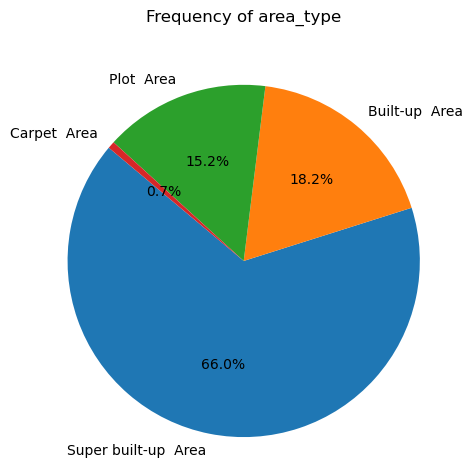

In [36]:
import matplotlib.pyplot as plt

channel_counts = j['area_type'].value_counts()

# Create a pie chart using matplotlib
plt.figure(figsize=(5, 5))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of area_type', y=1.1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


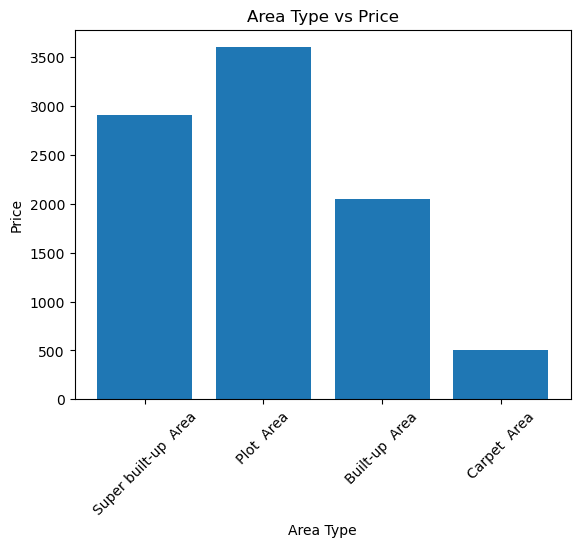

In [37]:
import matplotlib.pyplot as plt

plt.bar(j['area_type'], j['price'])
plt.xlabel('Area Type')
plt.ylabel('Price')
plt.title('Area Type vs Price')
plt.xticks(rotation=45)
plt.show()


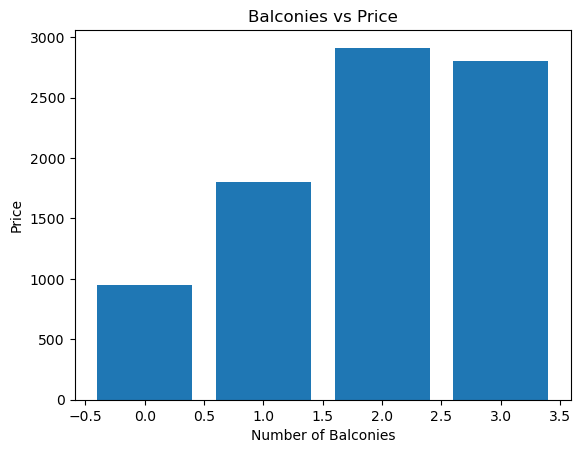

In [38]:
import matplotlib.pyplot as plt

plt.bar(j['balcony'], j['price'])
plt.xlabel('Number of Balconies')
plt.ylabel('Price')
plt.title('Balconies vs Price')
plt.show()


Locations with the highest average price:
                 location        price
337           Cubbon Road  1900.000000
131           Ashok Nagar  1486.000000
348        Defence Colony  1167.714286
1252               Yemlur  1093.388889
325         Church Street  1068.000000
340        D Souza Layout  1015.000000
1009      Sadashiva Nagar  1011.100000
1068        Sindhi Colony   988.000000
1090      Srinivas Colony   922.000000
47    5th Block Jayanagar   905.000000


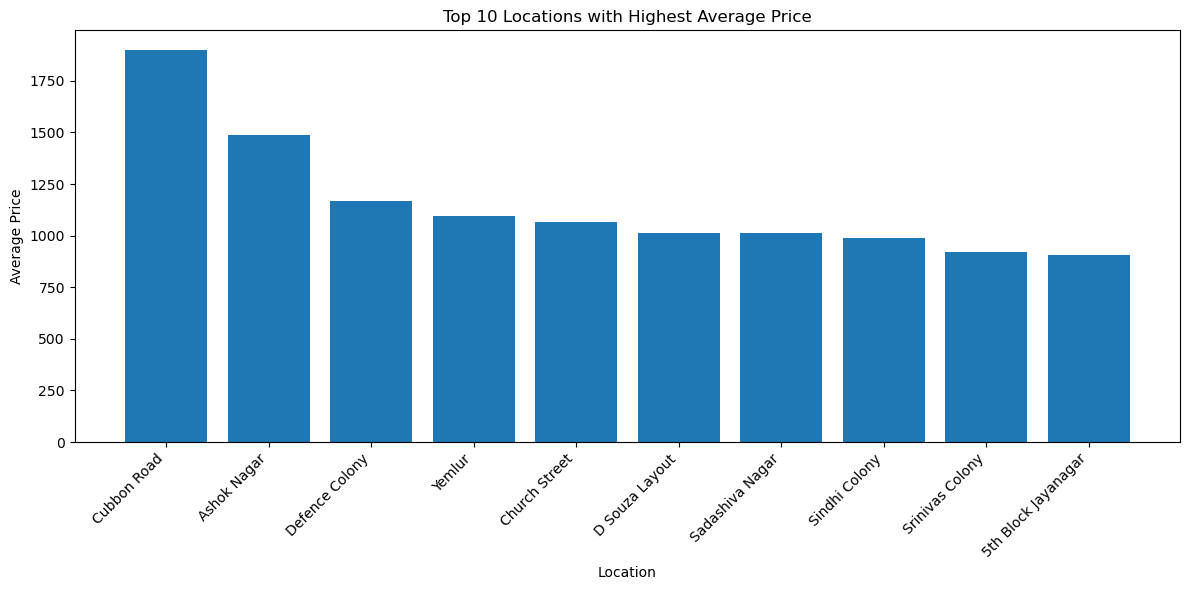

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

j['location'] = j['location'].str.strip()

location_prices = j.groupby('location')['price'].mean().reset_index()

location_prices_sorted = location_prices.sort_values(by='price', ascending=False)

print("Locations with the highest average price:")
print(location_prices_sorted.head(10))

plt.figure(figsize=(12, 6))
plt.bar(location_prices_sorted['location'].head(10), location_prices_sorted['price'].head(10))
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Top 10 Locations with Highest Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 10 societies with the highest average price:
      society   price
1034  Kierser  2700.0
652    Epllan  1915.0
63    Adion A  1800.0
1507  Phaku K  1500.0
1109  LeeyaCa  1063.0
1561  Prian E  1025.0
1407  Niateki  1015.0
814   HMeuran   988.0
1279  Masta A   986.0
886   ImncyTa   950.0


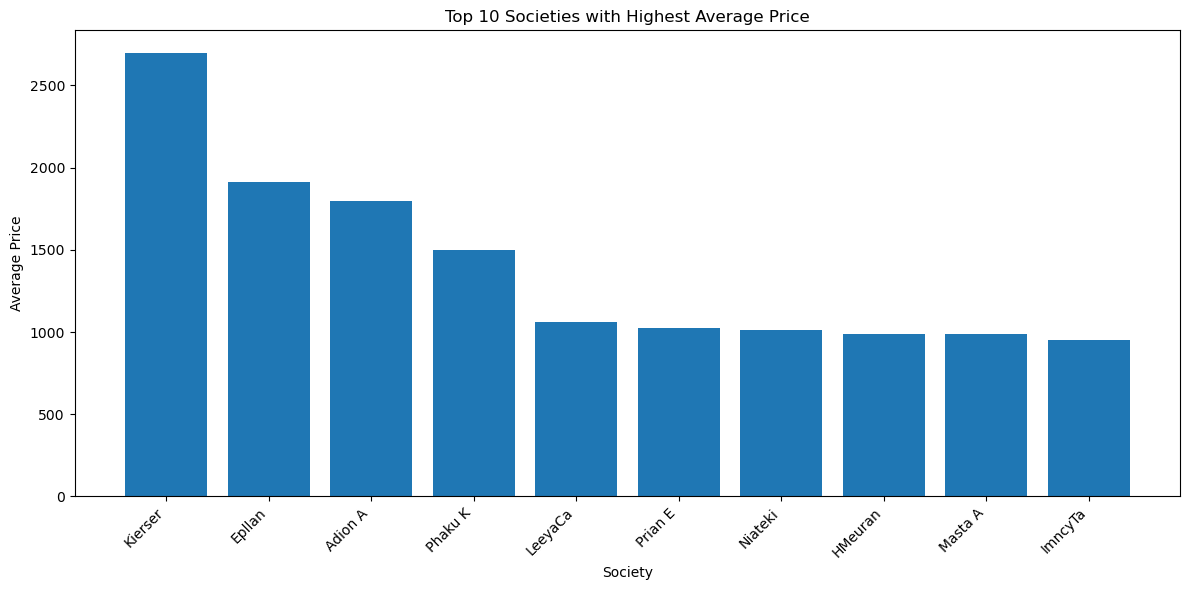

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

j['society'] = j['society'].str.strip()

society_prices = j.groupby('society')['price'].mean().reset_index()

society_prices_sorted = society_prices.sort_values(by='price', ascending=False)

print("Top 10 societies with the highest average price:")
print(society_prices_sorted.head(10))

plt.figure(figsize=(12, 6))
plt.bar(society_prices_sorted['society'].head(10), society_prices_sorted['price'].head(10))
plt.xlabel('Society')
plt.ylabel('Average Price')
plt.title('Top 10 Societies with Highest Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Model Building

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming x, y are your feature matrix and target vector respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)


In [42]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9294565328814397

# Evaluating Diff Models

In [51]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Define cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Evaluate each model
for name, model in models.items():
    cross_score = cross_val_score(model, x, y, cv=cv)
    print(f'{name}: {cross_score.mean()}')


Linear Regression: 0.9355512868820828
Ridge Regression: 0.937547956300411
Lasso Regression: 0.9159976579471605
Random Forest: 0.9734156912466603
Gradient Boosting: 0.9835843915042914
AdaBoost: 0.4575842780497563
Decision Tree: 0.880803692050241
Support Vector Machine: 0.7066184704662875
K-Nearest Neighbors: 0.9707633073796457


In [61]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression

# Define the Linear Regression model
lr = LinearRegression()

lr.fit(x_train, y_train)

# Define cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Evaluate Linear Regression model
cross_score = cross_val_score(lr, x, y, cv=cv)
print(f'Linear Regression: {cross_score.mean()}')


Linear Regression: 0.9355512868820828


# Making Predictions

In [62]:
def Price(location, bhk, sqft, bath, model):
    loc = np.where(x.columns == location)[0][0]

    x_input = np.zeros(len(x.columns))
    x_input[0] = bhk
    x_input[1] = sqft
    x_input[2] = bath
    x_input[3] = 6116.811390
    if loc >= 0:
        x_input[loc] = 1

    return model.predict([x_input])[0]


In [64]:
predicted_price = Price('1st Phase JP Nagar', 2, 1000, 2,lr)
print("Predicted price:", predicted_price)

Predicted price: 55.94816538958361


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [66]:
Price('2nd Phase Judicial Layout',4,11000, 4,lr)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


798.1290510133152

# Exporting Model 

In [ ]:
import pickle
with open('D:\JOY\J AMITY\Machine Learning/Price_Prediction_Model.pkl', 'wb') as f:
    pickle.dump(lr, f)


In [ ]:
import json
columns={
    'data_col': [col.lower() for col in x.columns]
}
with open('D:\JOY\J AMITY\Machine Learning/Property prediction col.json','w') as f:
    f.write(json.dumps(columns))